In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# era_AREA = area_grid_cell(lat, 0.375, 0.375)

In [3]:
coord_info = pd.read_csv('~/Desktop/lat_lon_dlat_dlon.csv')
c_lat = coord_info.lat.values
c_lon = coord_info.lon.values
d_phi = coord_info.dlon.values
d_theta = coord_info.dlat.values

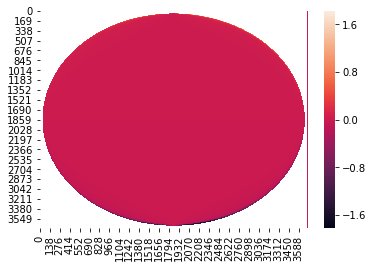

In [7]:
sns.heatmap(d_phi.reshape((3712,3712)) )

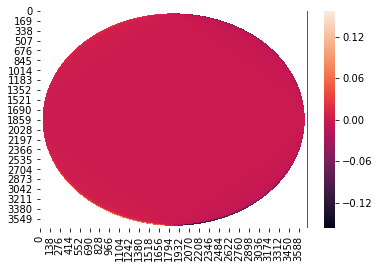

In [8]:
sns.heatmap(d_theta.reshape((3712,3712)) )

In [ ]:
#plt.scatter(c_lat.)

In [4]:
#c_lon[c_lon < -99] = np.nan
#c_lat[c_lat < -99] = np.nan

KeyboardInterrupt: 

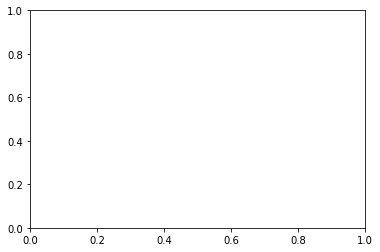

In [5]:
sns.kdeplot(c_lon, c_lat)

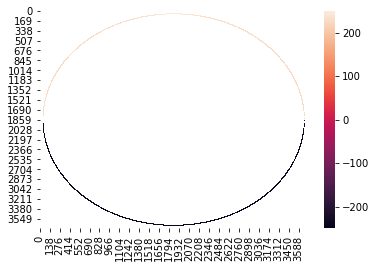

In [8]:
sns.heatmap(d_phi.reshape((3712, 3712)))

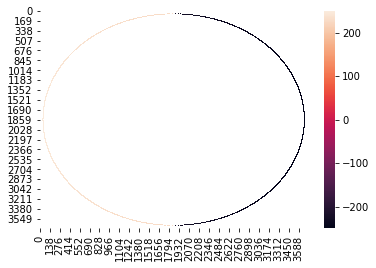

In [9]:
sns.heatmap(d_theta.reshape((3712, 3712)))